<a href="https://colab.research.google.com/github/KonstantinPhD/COVID-19-RUS/blob/master/mnist/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Пример из лекции № 12 (MNIST)

1. Подключим необходимые библиотеки

In [ ]:
from __future__ import print_function   
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils;
import pandas as pd;
import matplotlib.pyplot as plt;

2. Зададим параметры, необходимые для обучения сети. 
>Напомню, что  такое пакет (англ. batch). Возможны два подхода к реализации алгоритма обучения сети, например, используя метод градиентного спуска: стохастический и пакетный. 



>>> Стохастический градиентный спуск (англ. stochastic gradient descent) —
реализация, в которой на каждой итерации алгоритма из обучающей выборки каким-то (случайным) образом выбирается только один объект;


>>> Пакетный (батч) (англ. batch gradient descent) — реализация градиентного спуска, когда на каждой итерации обучающая выборка просматривается целиком, и только после этого изменяются веса модели.



In [ ]:
batch_size = 128; #размер партии данных, которая поступает на обучение, т.е.
#обучать сеть будем партиями, битчами
nr_classes = 10; # Количество классов
nr_iterations = 20; #Количество эпох (количество итераций)

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() #Загрузка датасета

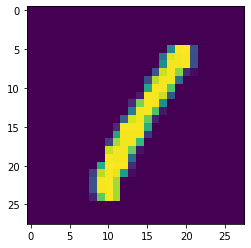

In [ ]:
plt.imshow(X_train[3])# Постмотрим на картинку

In [ ]:
print("Правильный ответ ",y_train[3])# Посмотрим на ответы в датасете

Правильный ответ  1


In [ ]:
#  картинку вытягиваем в столбец
#  Информация о взаимном расположении теряется (не совсем)

X_train = X_train.reshape(60000, 784); # 60000 - это количество картинок, 784 - размер 1-й картинки (28х28=784)
X_test = X_test.reshape(10000, 784);

In [ ]:
#  Уточняем тип данных

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#  Нормируем входные значения, что бы получить числа от 0 до 1!!!
X_train /= 255
X_test /= 255

In [ ]:
#  Делаем 10 бинарных столбцов (так как 10 цифр), формируем зависимые переменные, ответы.

Y_train = np_utils.to_categorical(y_train, nr_classes)
Y_test = np_utils.to_categorical(y_test, nr_classes)

In [ ]:
a=pd.DataFrame(Y_train)# Это не обязательный параметр.

In [ ]:
a.head() # Посмотрим, что содержится в данных Y_train

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#  Описываем сеть. Входной слой, один внутренний слой, выходной слой. Всего три слоя!!! 

model = Sequential()# Начало создания сети.
model.add(Dense(196, input_shape=(784,))) # входной (784 = 28х28 нейрона) и второй слой (196 нейронов).
model.add(Activation('relu'));
model.add(Dropout(0.5));
model.add(Dense(10))# количество нейронов в выходном слое;
model.add(Activation('softmax'));

In [ ]:
model.summary() #Не обязательный параметр.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 196)               153860    
                                                                 
 activation_2 (Activation)   (None, 196)               0         
                                                                 
 dropout_1 (Dropout)         (None, 196)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1970      
                                                                 
 activation_3 (Activation)   (None, 10)                0         
                                                                 
Total params: 155,830
Trainable params: 155,830
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Параметры целевой функции потерь.
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [ ]:
np.random.seed(1337)  # для воспроизводимости сети

# Обучаем сеть.
net_res_1 = model.fit(X_train, Y_train,epochs=nr_iterations,
                    batch_size = batch_size,
                    verbose = 1, validation_data = (X_test, Y_test));

Epoch 1/20
469/469 [==============================] - 4s 7ms/step - loss: 0.4412 - accuracy: 0.8692 - val_loss: 0.1922 - val_accuracy: 0.9441
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2223 - accuracy: 0.9353 - val_loss: 0.1385 - val_accuracy: 0.9601
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1755 - accuracy: 0.9491 - val_loss: 0.1154 - val_accuracy: 0.9645
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1473 - accuracy: 0.9567 - val_loss: 0.0987 - val_accuracy: 0.9708
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1327 - accuracy: 0.9602 - val_loss: 0.0895 - val_accuracy: 0.9740
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1182 - accuracy: 0.9639 - val_loss: 0.0822 - val_accuracy: 0.9755
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1096 - accuracy: 0.9657 - val_loss: 0.0779 - val_accuracy: 0.9764
Epoch 

In [ ]:
score = model.evaluate(X_test, Y_test, verbose = 0)# Вычислим ошибки обучения.
print(score) 

[160.10745239257812, 0.08669999986886978]


**Проверим работу модели, визуально**

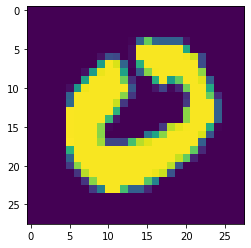

In [ ]:
plt.imshow(X_test[25].reshape(28,28))# Посмотрим на картинку №28.

In [ ]:
df=X_test[25].reshape(1,784); #Растянем картинку в вектор.

ans=model.predict(df);# Воспользуемся моделью для решения задачи классификации.

ans=pd.DataFrame(ans);# Представим ответ в формате DataFrame для удобства просмотра

In [ ]:
round(ans,2)# Посмотрим на результат.

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Спасибо за внимание!!!